
Logistic Regression:
Confusion Matrix:
[[18127   165]
 [  660  1048]]


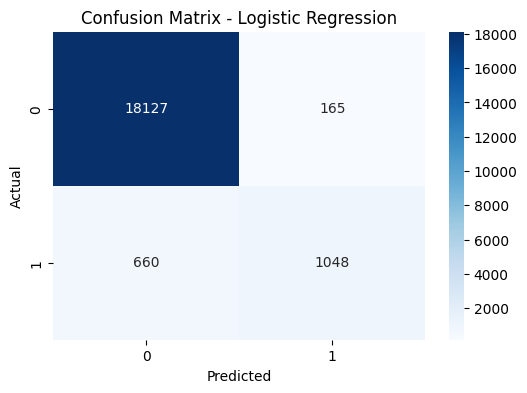

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Decision Tree:
Confusion Matrix:
[[17786   506]
 [  445  1263]]


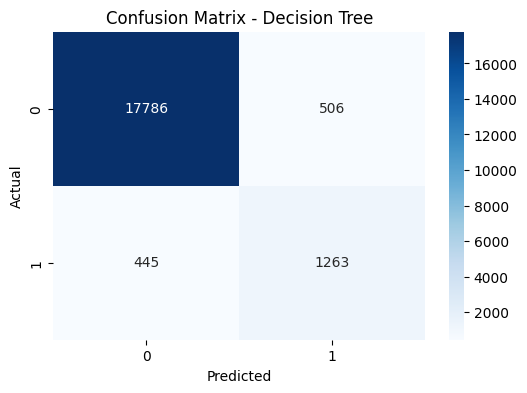

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Random Forest:
Confusion Matrix:
[[18223    69]
 [  532  1176]]


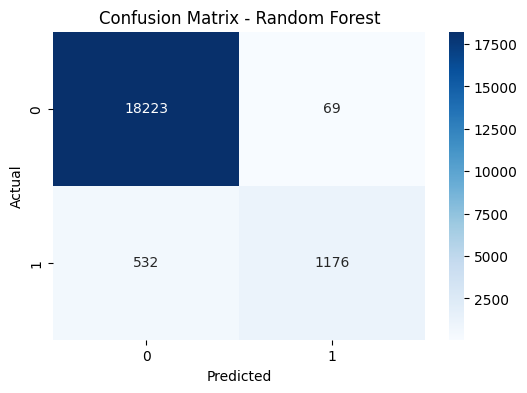

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


K-Nearest Neighbors:
Confusion Matrix:
[[18160   132]
 [  819   889]]


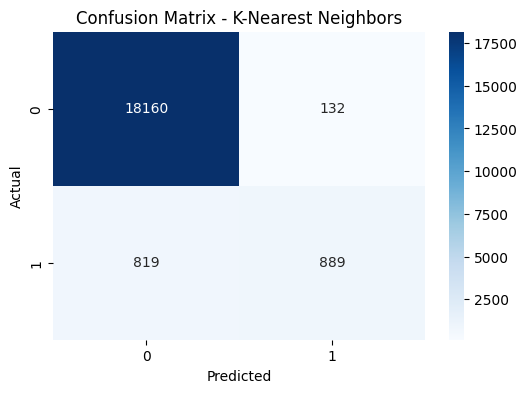

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.87      0.52      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.95      0.95      0.95     20000


Support Vector Machine:
Confusion Matrix:
[[18292     0]
 [ 1053   655]]


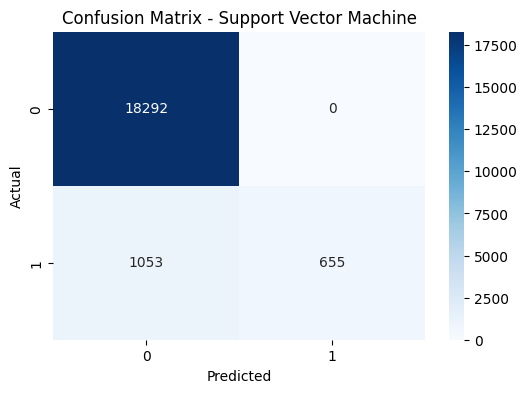

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       1.00      0.38      0.55      1708

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.76     20000
weighted avg       0.95      0.95      0.94     20000


Naive Bayes:
Confusion Matrix:
[[17005  1287]
 [  618  1090]]


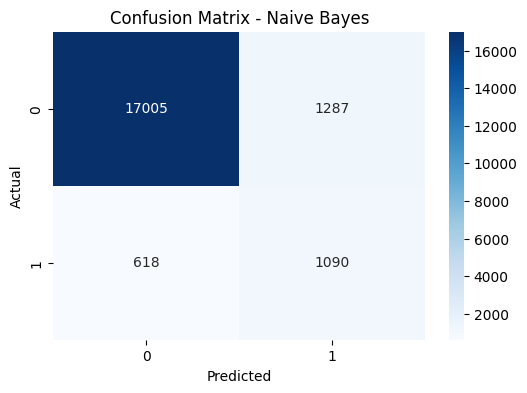

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000


Overall Accuracy Results:
Logistic Regression: Accuracy = 0.96
Decision Tree: Accuracy = 0.95
Random Forest: Accuracy = 0.97
K-Nearest Neighbors: Accuracy = 0.95
Support Vector Machine: Accuracy = 0.95
Naive Bayes: Accuracy = 0.90


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('diabetes.csv')

# Preprocess the dataset
# Encode categorical variables if necessary
if data['gender'].dtype == 'object':
    le = LabelEncoder()
    data['gender'] = le.fit_transform(data['gender'])

if 'smoking_history' in data.columns and data['smoking_history'].dtype == 'object':
    data['smoking_history'] = le.fit_transform(data['smoking_history'].fillna('No Info'))

# Handle missing values if any
data = data.dropna()

# Split features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Evaluate classifiers
accuracy_results = {}
for name, clf in classifiers.items():
    print(f"\n{name}:")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Display overall accuracy results
print("\nOverall Accuracy Results:")
for model, accuracy in accuracy_results.items():
    print(f'{model}: Accuracy = {accuracy:.2f}')
